# Von der Lineare zur Logistischen Regression

## Imports

In [1]:
import numpy as np
np.random.seed(3)
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

## Datengrundlage

In [2]:
# Originale Daten
x = np.random.randint(0,1400,50)
y = x*0.053+16
y += np.random.normal(-5,5,50)

x = x.reshape(-1, 1)

# X Werte normalisieren
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

# Target binärisieren - Bestanden?
passed = np.where(y>=50, 1, 0)

## Vergleichsmodell

## Plain Functions

In [3]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def predict(x,w,b):
    predictions = sigmoid(np.dot(x,w)+b)
    clipped_predictions = np.clip(predictions,0.0000000001,0.99999999)
    return clipped_predictions

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
    return loss

def gradient(x,y,prediction):
    m = x.shape[0]
    dw = 1/m*np.sum(np.dot(x.T, (prediction - y)))
    db = 1/m*np.sum((prediction - y)) 
    return dw,db

## Voranalyse

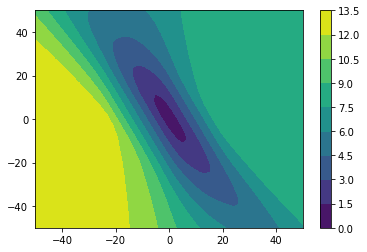

0.7155808609507914 [-1.0204081632653015, 1.0204081632653086]


In [4]:
es = []
w_axis = np.linspace(-50,50)
b_axis = np.linspace(-50,50)
z = []
smallest = 1000
best_values = []
for wi in w_axis:
    for bi in b_axis:
        l = loss(passed,predict(x_norm,wi,bi))
        z.append(l)
        if l < smallest:
            smallest = l
            best_values = [wi,bi]
plt.contourf(w_axis, b_axis, np.array(z).reshape(50,50))
plt.colorbar()
plt.show()
print(smallest, best_values)

## Training

In [5]:
w = np.array([0.3])
b = np.array([0.3]) # Beliebiger Startpunkt
errors = []
gradients = []
lr = 0.00001

for i in range(1000):
    prediction = predict(x,w,b)
    dw, db = gradient(x,passed,prediction)
    errors.append(loss(passed,prediction))
    gradients.append([dw,db])
    
    w = w - lr*dw
    b = b - lr*db
    
print("Optimal w, b: ",w,b)
print("Final Loss: ",loss(passed,predict(x,w,b)))

Optimal w, b:  [0.00081708] [0.29788215]
Final Loss:  0.6462340703820877


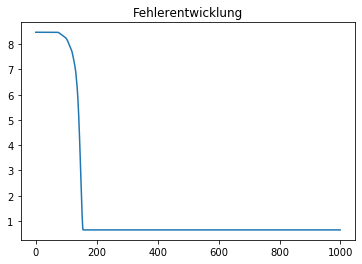

In [6]:
plt.plot(errors)
plt.title("Fehlerentwicklung")
plt.show()

## Klassifikationsraum visualisieren

In [7]:
z = []
for x1 in np.linspace(0,100):
    for x2 in np.linspace(0,1400):
        z.append(predict(x2.reshape(-1, 1),w,b))

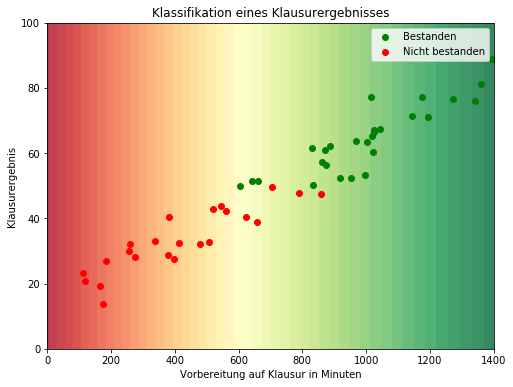

In [15]:
ax1, ax2 = np.meshgrid(np.linspace(0,1400),np.linspace(0,100))
plt.figure(figsize=(8,6))
plt.contourf(ax1,ax2,np.array(z).reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.8)
plt.scatter(x[np.argwhere(y>=50)].ravel(),y[np.argwhere(y>=50)].ravel(),c="green",label="Bestanden")
plt.scatter(x[np.argwhere(y<50)].ravel(),y[np.argwhere(y<50)].ravel(),c="red",label="Nicht bestanden")
plt.xlim([0,1400])
plt.ylim([0,100])
plt.title("Klassifikation eines Klausurergebnisses")
plt.xlabel("Vorbereitung auf Klausur in Minuten")
plt.ylabel("Klausurergebnis")
plt.legend()
plt.show()